# Import

In [286]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [287]:
CSV_PATH= 'binance_crypto_data.csv'

In [288]:
# Schritt 2: Laden der Daten und Auswahl eines Beispiels (z. B. BTCUSDT)
binance_data = pd.read_csv(CSV_PATH, parse_dates=["timestamp"])

In [289]:
# Schritt 2: Laden der Daten und Auswahl eines Beispiels (z. B. BTCUSDT)
binance_data = pd.read_csv(CSV_PATH, parse_dates=["timestamp"])


In [290]:
# 📌 Pfade zu den CSV-Dateien
DRIVE_PATH = "G:/Meine Ablage/reddit/"
REDDIT_CSV = os.path.join(DRIVE_PATH, "reddit_merged.csv")


# 🔹 **Funktion zum Laden der CSV-Dateien**
def load_csv(filepath):
    """Lädt eine CSV-Datei mit `|` als Trennzeichen und Debugging-Infos"""
    if not os.path.exists(filepath):
        print(f"❌ Datei nicht gefunden: {filepath}")
        return pd.DataFrame()

    df = pd.read_csv(filepath, sep="|", encoding="utf-8-sig", on_bad_lines="skip")

    print(f"\n📌 Datei geladen: {filepath}")
    print(f"🔹 Spalten: {df.columns.tolist()}")
    print(df.dtypes)
    print(df.head())

    return df

# 📌 **Daten laden**
sentiment_data = load_csv(REDDIT_CSV)


📌 Datei geladen: G:/Meine Ablage/reddit/reddit_merged.csv
🔹 Spalten: ['post_id', 'comment_id', 'type', 'date', 'time', 'crypto', 'search_term', 'subreddit', 'author', 'full_text', 'score', 'sentiment', 'sentiment_confidence']
post_id                  object
comment_id               object
type                     object
date                     object
time                     object
crypto                   object
search_term              object
subreddit                object
author                   object
full_text                object
score                     int64
sentiment                object
sentiment_confidence    float64
dtype: object
   post_id comment_id  type        date      time   crypto search_term  \
0  1j0dz4r        NaN  post  2025-02-28  18:01:02  Bitcoin     bitcoin   
1  1j0dghm        NaN  post  2025-02-28  17:39:22  Bitcoin     bitcoin   
2  1j0cx0g        NaN  post  2025-02-28  17:16:50  Bitcoin     bitcoin   
3  1j0cnlh        NaN  post  2025-02-28  17:06:

In [291]:
# Schritt 1: Mapping zwischen Binance-Symbolen und den entsprechenden Crypto-Namen aus den Sentiment-Daten
crypto_mapping = {
    "BTCUSDT": "Bitcoin",
    "ETHUSDT": "Ethereum",
    "SOLUSDT": "Solana",
    "AVAXUSDT": "Avalanche",
    "DOTUSDT": "Polkadot",
    "MATICUSDT": "Polygon",
    "XRPUSDT": "XRP",
    "ADAUSDT": "Cardano",
    "BNBUSDT": "Binance Coin",
    "LTCUSDT": "Litecoin",
    "DOGEUSDT": "Dogecoin",
    "TRXUSDT": "TRON",
    "AAVEUSDT": "Aave",
    "HBARUSDT": "Hedera",
    "FILUSDT": "Filecoin",
    "ATOMUSDT": "Cosmos",
    "GALAUSDT": "Gala",
    "SANDUSDT": "The Sandbox",
    "AUDIOUSDT": "Audius",
    "RNDRUSDT": "RNDR",
    "KSMUSDT": "Kusama",
    "VETUSDT": "VeChain",
    "LINKUSDT": "Chainlink",
    "NEARUSDT": "Near",
    "CROUSDT": "Cronos",
    "PYRUSDT": "PYR",
    "CHZUSDT": "Chiliz",
    "ILVUSDT": "Illuvium",
    "RONUSDT": "Ronin",
    "BANDUSDT": "Band Protocol",
    "OPUSDT": "Optimism",
    "TIAUSDT": "TIA",
    "NMRUSDT": "Numeraire",
    "ATHUSDT": "ATH",
    "SUIUSDT": "Sui",
    "HYPUSDT": "HYP",
    "HOODUSDT": "Hood",
    "TRUMPUSDT": "Trump",
    "USDCUSDT": "USDC",
    "SHIBUSDT": "Shiba Inu",
    "PEPEUSDT": "Pepe",
    "FLOKIUSDT": "Floki",
    "BONKUSDT": "Bonk",
    "WOJAKUSDT": "Wojak",
    "MOGUSDT": "Mogus",
    "LEASHUSDT": "Leash",
    "BABYDOGEUSDT": "Baby Doge",
    "DEGENUSDT": "Degen",
    "TOSHIUSDT": "Toshi",
    "FARTUSDT": "Fart",
    "BANANAUSDT": "Banana",
    "KABOSUUSDT": "Kabosu",
    "HUSKYUSDT": "Husky",
    "SAMOUSDT": "Samo",
    "MILKBAGUSDT": "MilkBag",
    "ARBUSDT": "Arbitrum",
    "STRKUSDT": "Strike",
    "INJUSDT": "Injective",
    "SEIUSDT": "Sei",
    "APTUSDT": "Aptos",
    "EIGENUSDT": "Eigen",
    "MNTUSDT": "Mantle",
    "IMXUSDT": "Immutable X",
    "ONDOUSDT": "Ondo",
    "WLDUSDT": "Worldcoin",
    "AEROUSDT": "Aero",
    "JUPUSDT": "Jupiter",
    "RUNEUSDT": "THORChain",
    "PENDLEUSDT": "Pendle",
    "KUJIUSDT": "Kuji",
    "NOBLEUSDT": "Noble",
    "STRDUSDT": "Stride",
    "DYMUSDT": "DYM",
    "SEAMUSDT": "Seam",
    "BLASTUSDT": "Blast",
    "MERLINUSDT": "Merlin",
    "TAPIOCAUSDT": "Tapioca",
    "ARCADIAUSDT": "Arcadia",
    "NOTUSDT": "Not",
    "OMNIUSDT": "Omni",
    "LZUSDT": "LZ",
    "ZETAUSDT": "Zeta",
    "FRIENDUSDT": "Friend"
}

# Transform

In [292]:
binance_data["date"] = binance_data["timestamp"]
# Neue Spalte 'crypto' in binance_data basierend auf 'symbol' erstellen
binance_data["crypto"] = binance_data["symbol"].map(crypto_mapping)

# Konvertiere die "date"-Spalte in beiden DataFrames zu datetime
binance_data["date"] = pd.to_datetime(binance_data["date"])
sentiment_data["date"] = pd.to_datetime(sentiment_data["date"])

# Überprüfe die Datentypen
print(binance_data["date"].dtype)
print(sentiment_data["date"].dtype)


datetime64[ns]
datetime64[ns]


In [293]:
# Definieren des Bewertungssystems
sentiment_mapping = {
    "bullish": 1,
    "neutral": 0,
    "bearish": -1
}
sentiment_data["sentiment_score"] = sentiment_data["sentiment"].map(sentiment_mapping)

# Berechnung eines gewichteten Sentiment-Scores unter Einbeziehung der Vertrauenswerte
sentiment_data["weighted_score"] = sentiment_data["sentiment_score"] * sentiment_data["sentiment_confidence"]

# Füge eine Zählspalte hinzu, die für jede Zeile 1 zählt
sentiment_data["post_count"] = 1

# Aggregation der gewichteten Scores und der Post Counts pro Tag und Crypto
sentiment_aggregated = sentiment_data.groupby(["date", "crypto"]).agg({
    "weighted_score": "mean",
    "post_count": "sum"
}).reset_index()

print(sentiment_aggregated.head())


        date         crypto  weighted_score  post_count
0 2024-11-01           Aave        0.038530          12
1 2024-11-01      Aerodrome        0.360183           5
2 2024-11-01         Aethir        0.166239           8
3 2024-11-01       Arbitrum        0.186555           3
4 2024-11-01  Band Protocol        0.118261          43


In [294]:
binance_data.dtypes

symbol               object
level_1               int64
timestamp    datetime64[ns]
open                float64
high                float64
low                 float64
close               float64
volume              float64
date         datetime64[ns]
crypto               object
dtype: object

In [295]:
sentiment_aggregated.dtypes

date              datetime64[ns]
crypto                    object
weighted_score           float64
post_count                 int64
dtype: object

In [296]:
# Bestimmen des gemeinsamen Datumsbereichs
min_date = max(binance_data["date"].min(), sentiment_data["date"].min())
max_date = min(binance_data["date"].max(), sentiment_data["date"].max())
print("Gemeinsamer Datumsbereich:", min_date, "-", max_date)

Gemeinsamer Datumsbereich: 2024-11-01 00:00:00 - 2025-03-01 00:00:00


In [297]:
# Setze den gemeinsamen Datumsbereich
min_date = pd.Timestamp("2024-11-01")
max_date = pd.Timestamp("2025-03-01")

# Filtere die Binance-Daten auf diesen Bereich
binance_filtered = binance_data[(binance_data["date"] >= min_date) & (binance_data["date"] <= max_date)]

# Filtere den aggregierten Sentiment-DataFrame auf diesen Bereich
sentiment_aggregated_filtered = sentiment_aggregated[(sentiment_aggregated["date"] >= min_date) & (sentiment_aggregated["date"] <= max_date)]

print("Binance-Daten:", binance_filtered["date"].min(), "-", binance_filtered["date"].max())
print("Sentiment-Daten:", sentiment_aggregated_filtered["date"].min(), "-", sentiment_aggregated_filtered["date"].max())

# Mapping für Binance-Symbole in den 'crypto'-Namen anwenden (falls noch nicht geschehen)
binance_filtered["crypto"] = binance_filtered["symbol"].map(crypto_mapping)

# Merge der gefilterten DataFrames anhand von "date" und "crypto"
merged_data = pd.merge(binance_filtered, sentiment_aggregated_filtered, on=["date", "crypto"], how="inner")
print(merged_data.head())


Binance-Daten: 2024-11-01 00:00:00 - 2025-03-01 00:00:00
Sentiment-Daten: 2024-11-01 00:00:00 - 2025-03-01 00:00:00
    symbol  level_1  timestamp      open      high       low     close  \
0  BTCUSDT      861 2024-11-01  70292.01  71632.95  68820.14  69496.01   
1  BTCUSDT      862 2024-11-02  69496.00  69914.37  69000.14  69374.74   
2  BTCUSDT      863 2024-11-03  69374.74  69391.00  67478.73  68775.99   
3  BTCUSDT      864 2024-11-04  68775.99  69500.00  66835.00  67850.01   
4  BTCUSDT      866 2024-11-06  69372.01  76400.00  69298.00  75571.99   

          volume       date   crypto  weighted_score  post_count  
0   38301.867550 2024-11-01  Bitcoin       -0.000708           2  
1   10521.672430 2024-11-02  Bitcoin        0.183913          42  
2   24995.702430 2024-11-03  Bitcoin        0.206548          31  
3   29800.391870 2024-11-04  Bitcoin        0.240339          12  
4  104126.994787 2024-11-06  Bitcoin        0.125345           4  


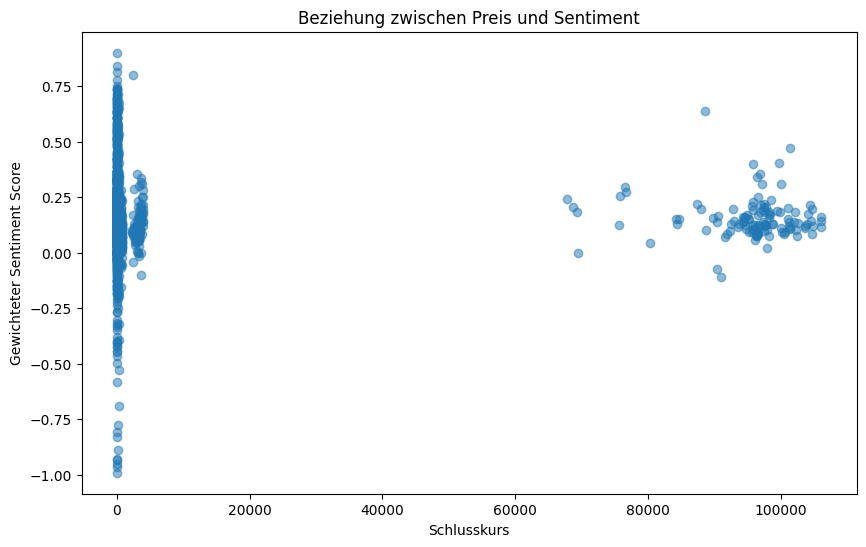

In [298]:
# Schritt 2: Visualisierung der Beziehung zwischen Preis und gewichteten Sentiment-Score
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(merged_data["close"], merged_data["weighted_score"], alpha=0.5)
plt.xlabel("Schlusskurs")
plt.ylabel("Gewichteter Sentiment Score")
plt.title("Beziehung zwischen Preis und Sentiment")
plt.show()

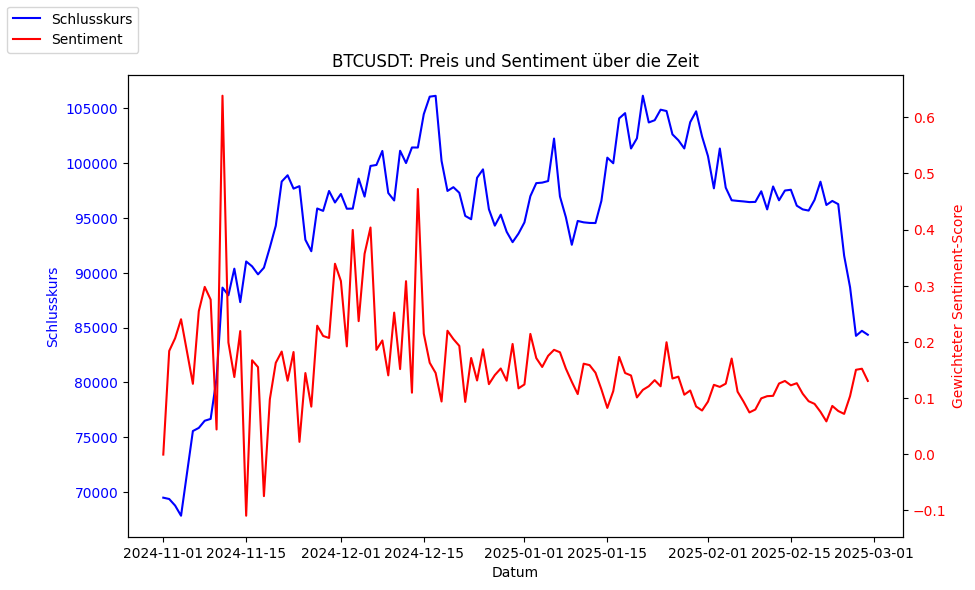

In [299]:
# ------------------------------------------------------------------------------
# 1) Zeitverlauf mit zweiter y-Achse (Beispiel für BTCUSDT)
# ------------------------------------------------------------------------------
# Filter für BTCUSDT und sortiere nach Datum
btc_data = merged_data[merged_data["symbol"] == "BTCUSDT"].copy()
btc_data.sort_values("date", inplace=True)

# Erstelle ein Plot-Fenster mit zwei y-Achsen
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot für den Preis (Schlusskurs) auf der ersten y-Achse
ax1.plot(btc_data["date"], btc_data["close"], color="blue", label="Schlusskurs")
ax1.set_xlabel("Datum")
ax1.set_ylabel("Schlusskurs", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Plot für den Sentiment-Score auf der zweiten y-Achse
ax2 = ax1.twinx()
ax2.plot(btc_data["date"], btc_data["weighted_score"], color="red", label="Sentiment")
ax2.set_ylabel("Gewichteter Sentiment-Score", color="red")
ax2.tick_params(axis="y", labelcolor="red")

plt.title("BTCUSDT: Preis und Sentiment über die Zeit")
fig.legend(loc="upper left")
plt.show()

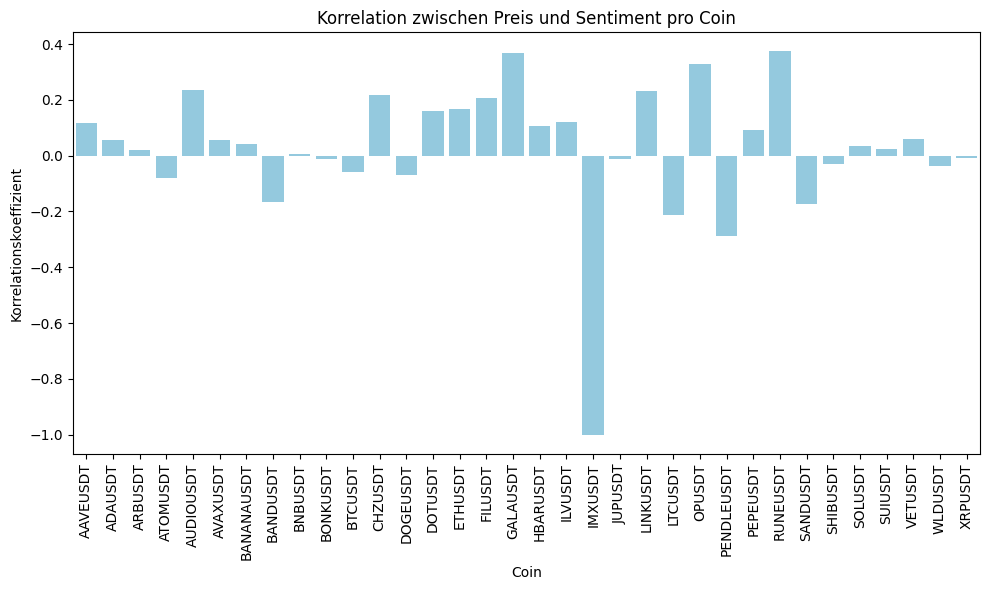

In [300]:
# ------------------------------------------------------------------------------
# 2) Korrelation pro Coin (Barplot)
# ------------------------------------------------------------------------------
# Erstelle eine Liste, in der die Korrelationen pro Coin gespeichert werden
corr_values = []

for coin, group in merged_data.groupby("symbol"):
    # Nur wenn es genügend Varianz in den Daten gibt, berechnen wir eine Korrelation
    if group["close"].nunique() > 1 and group["weighted_score"].nunique() > 1:
        corr = group[["close", "weighted_score"]].corr().iloc[0, 1]
    else:
        corr = np.nan  # Keine Korrelation bestimmbar
    corr_values.append({"symbol": coin, "correlation": corr})

# In DataFrame umwandeln
corr_df = pd.DataFrame(corr_values)

# Visualisieren als Balkendiagramm
plt.figure(figsize=(10, 6))
sns.barplot(data=corr_df, x="symbol", y="correlation", color="skyblue")
plt.xticks(rotation=90)
plt.title("Korrelation zwischen Preis und Sentiment pro Coin")
plt.xlabel("Coin")
plt.ylabel("Korrelationskoeffizient")
plt.tight_layout()
plt.show()

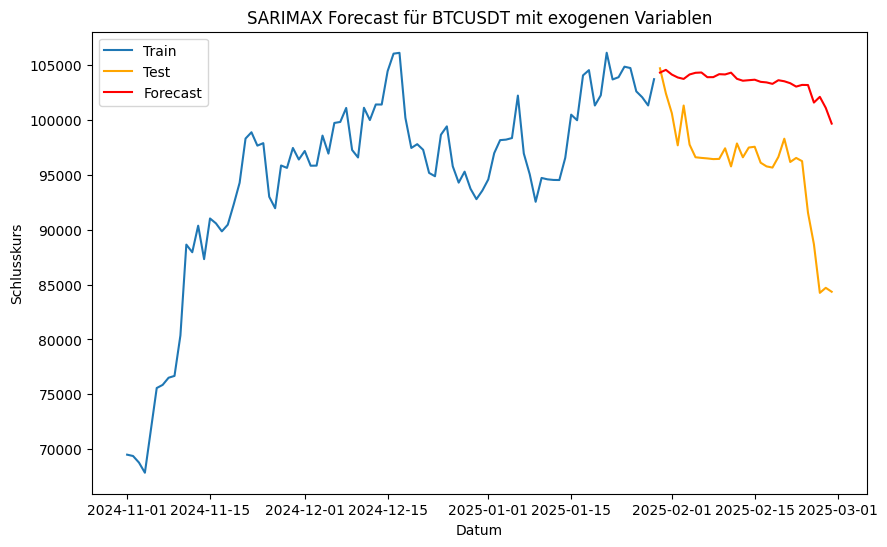

In [301]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Filtere die Daten für BTCUSDT
btc_data = merged_data[merged_data["symbol"] == "BTCUSDT"].copy()
btc_data["date"] = pd.to_datetime(btc_data["date"])
btc_data.sort_values("date", inplace=True)
btc_data.set_index("date", inplace=True)

# Aufteilen in Trainings- und Testdaten (z. B. letzte 30 Tage als Test)
train = btc_data.iloc[:-30]
test = btc_data.iloc[-30:]

# Exogene Variablen: gewichteter Sentiment-Score und Post-Count
exog_train = train[["weighted_score", "post_count"]]
exog_test = test[["weighted_score", "post_count"]]

# Erstellen und Trainieren eines SARIMAX-Modells (Beispiel: order=(1,1,1))
model = SARIMAX(train["close"], exog=exog_train, order=(1, 1, 1))
model_fit = model.fit(disp=False)

# Prognose für die Testperiode
forecast = model_fit.forecast(steps=30, exog=exog_test)

# Plot der Ergebnisse
plt.figure(figsize=(10, 6))
plt.plot(train.index, train["close"], label="Train")
plt.plot(test.index, test["close"], label="Test", color="orange")
plt.plot(test.index, forecast, label="Forecast", color="red")
plt.xlabel("Datum")
plt.ylabel("Schlusskurs")
plt.title("SARIMAX Forecast für BTCUSDT mit exogenen Variablen")
plt.legend()
plt.show()


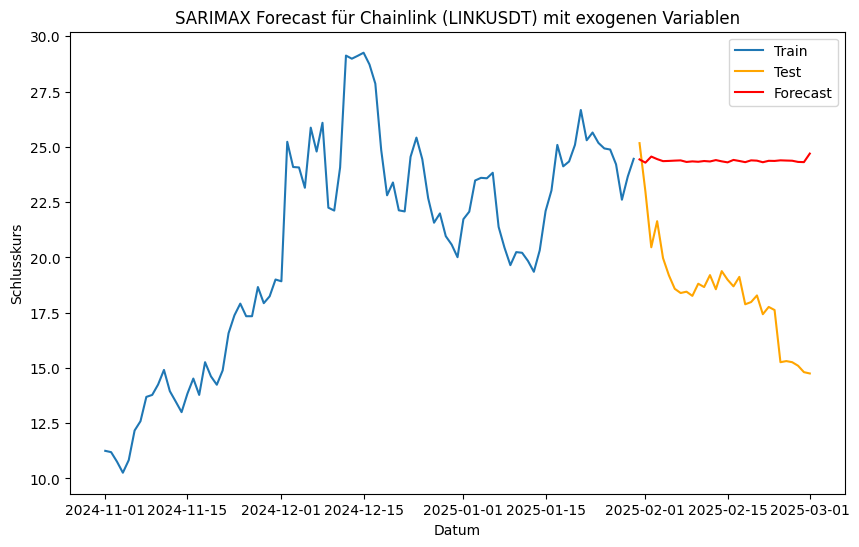

In [302]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Filtere die Daten für Chainlink (LINKUSDT)
chainlink_data = merged_data[merged_data["symbol"] == "LINKUSDT"].copy()
chainlink_data["date"] = pd.to_datetime(chainlink_data["date"])
chainlink_data.sort_values("date", inplace=True)
chainlink_data.set_index("date", inplace=True)

# Aufteilen in Trainings- und Testdaten (z. B. letzte 30 Tage als Test)
train = chainlink_data.iloc[:-30]
test = chainlink_data.iloc[-30:]

# Exogene Variablen: gewichteter Sentiment-Score und Post-Count
exog_train = train[["weighted_score", "post_count"]]
exog_test = test[["weighted_score", "post_count"]]

# Erstellen und Trainieren eines SARIMAX-Modells (Beispiel: order=(1, 1, 1))
model = SARIMAX(train["close"], exog=exog_train, order=(1, 1, 1))
model_fit = model.fit(disp=False)

# Prognose für die Testperiode
forecast = model_fit.forecast(steps=30, exog=exog_test)

# Plot der Ergebnisse
plt.figure(figsize=(10, 6))
plt.plot(train.index, train["close"], label="Train")
plt.plot(test.index, test["close"], label="Test", color="orange")
plt.plot(test.index, forecast, label="Forecast", color="red")
plt.xlabel("Datum")
plt.ylabel("Schlusskurs")
plt.title("SARIMAX Forecast für Chainlink (LINKUSDT) mit exogenen Variablen")
plt.legend()
plt.show()


# Modell

In [303]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Daten für Chainlink filtern und vorbereiten
chainlink_data = merged_data[merged_data["symbol"] == "LINKUSDT"].copy()
chainlink_data["date"] = pd.to_datetime(chainlink_data["date"])
chainlink_data.sort_values("date", inplace=True)
chainlink_data.set_index("date", inplace=True)

# Aufteilen in Trainings- und Testdaten (letzte 30 Tage als Test)
train = chainlink_data.iloc[:-30]
test = chainlink_data.iloc[-30:]

In [304]:
# ---------------------------------------------------------------
# Basismodell: SARIMAX ohne exogene Variablen (nur historische Daten)
# ---------------------------------------------------------------
model_baseline = SARIMAX(train["close"], order=(1, 1, 1))
model_baseline_fit = model_baseline.fit(disp=False)
forecast_baseline = model_baseline_fit.forecast(steps=30)

# ---------------------------------------------------------------
# Modell mit exogenen Variablen: gewichteter Sentiment-Score und Post-Count
# ---------------------------------------------------------------
exog_train = train[["weighted_score", "post_count"]]
exog_test = test[["weighted_score", "post_count"]]

model_exog = SARIMAX(train["close"], exog=exog_train, order=(1, 1, 1))
model_exog_fit = model_exog.fit(disp=False)
forecast_exog = model_exog_fit.forecast(steps=30, exog=exog_test)

# ---------------------------------------------------------------
# Vergleich der Vorhersagen: Fehlermaße berechnen
# ---------------------------------------------------------------
mae_baseline = mean_absolute_error(test["close"], forecast_baseline)
mse_baseline = mean_squared_error(test["close"], forecast_baseline)
mae_exog = mean_absolute_error(test["close"], forecast_exog)
mse_exog = mean_squared_error(test["close"], forecast_exog)

print("Baseline Modell - MAE:", mae_baseline, "MSE:", mse_baseline)
print("Exogenes Modell - MAE:", mae_exog, "MSE:", mse_exog)

Baseline Modell - MAE: 6.150035920948822 MSE: 42.48614149074137
Exogenes Modell - MAE: 6.028671075059693 MSE: 40.98933585480086


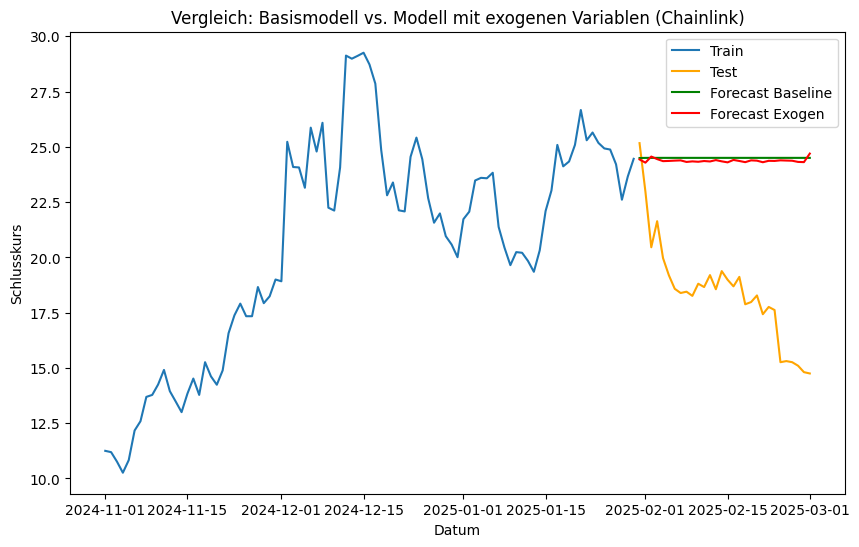

In [305]:
# Plot: Vergleich der Forecasts
# ---------------------------------------------------------------
plt.figure(figsize=(10, 6))
plt.plot(train.index, train["close"], label="Train")
plt.plot(test.index, test["close"], label="Test", color="orange")
plt.plot(test.index, forecast_baseline, label="Forecast Baseline", color="green")
plt.plot(test.index, forecast_exog, label="Forecast Exogen", color="red")
plt.xlabel("Datum")
plt.ylabel("Schlusskurs")
plt.title("Vergleich: Basismodell vs. Modell mit exogenen Variablen (Chainlink)")
plt.legend()
plt.show()

In [306]:
# Definieren von chainlink_sentiment aus merged_data:
global_data = merged_data[merged_data["symbol"] == "LINKUSDT"].copy()
global_data["date"] = pd.to_datetime(global_data["date"])
global_data.sort_values("date", inplace=True)
global_data.set_index("date", inplace=True)

# Optional: Überprüfe, ob alle notwendigen Spalten vorhanden sind
print(global_data.head())


              symbol  level_1  timestamp   open   high    low  close  \
date                                                                   
2024-11-01  LINKUSDT      861 2024-11-01  11.41  11.73  11.13  11.25   
2024-11-02  LINKUSDT      862 2024-11-02  11.24  11.40  11.07  11.19   
2024-11-03  LINKUSDT      863 2024-11-03  11.19  11.24  10.51  10.76   
2024-11-04  LINKUSDT      864 2024-11-04  10.75  10.92  10.07  10.26   
2024-11-05  LINKUSDT      865 2024-11-05  10.25  10.94  10.18  10.83   

                volume     crypto  weighted_score  post_count  
date                                                           
2024-11-01  3095385.47  Chainlink        0.150574           4  
2024-11-02  2144981.92  Chainlink        0.000000           2  
2024-11-03  3043948.92  Chainlink        0.041067           9  
2024-11-04  3285395.24  Chainlink        0.080353          13  
2024-11-05  2451648.01  Chainlink        0.274734          24  


In [307]:
# Entferne unnötige Spalten, die nicht als Features dienen
columns_to_drop = ['full_text', 'post_id', 'comment_id', 'subreddit', 'author', 'time', 'type', 'search_term', 'level_1','timestamp','symbol']
global_data = global_data.drop(columns=columns_to_drop, errors='ignore')

# Überprüfe danach die Datentypen
print(global_data.dtypes)


open              float64
high              float64
low               float64
close             float64
volume            float64
crypto             object
weighted_score    float64
post_count          int64
dtype: object


In [308]:
global_data.head()

,open,high,low,close,volume,crypto,weighted_score,post_count
date,,,,,,,,
2024-11-01,11.41,11.73,11.13,11.25,3095385.47,Chainlink,0.150574,4
2024-11-02,11.24,11.40,11.07,11.19,2144981.92,Chainlink,0.000000,2
2024-11-03,11.19,11.24,10.51,10.76,3043948.92,Chainlink,0.041067,9
2024-11-04,10.75,10.92,10.07,10.26,3285395.24,Chainlink,0.080353,13
2024-11-05,10.25,10.94,10.18,10.83,2451648.01,Chainlink,0.274734,24


In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Kombiniere die Daten aller Währungen
global_data = merged_data.copy()
global_data["date"] = pd.to_datetime(global_data["date"])
global_data.sort_values("date", inplace=True)
global_data.set_index("date", inplace=True)

In [310]:
# Entferne unnötige Spalten, die nicht als Features dienen
columns_to_drop = ['level_1','timestamp','symbol']
global_data = global_data.drop(columns=columns_to_drop, errors='ignore')

In [313]:
# 2. Berechne Log-Renditen
global_data['log_return'] = np.log(global_data['close'] / global_data['close'].shift(1))
global_data.dropna(subset=['log_return'], inplace=True)

# 3. Erstelle Dummy-Variablen für jede Währung
dummies = pd.get_dummies(global_data['crypto'], prefix='coin')
global_data = pd.concat([global_data, dummies], axis=1)
global_data = global_data.drop(columns=["crypto"])
# 4. Definiere die exogenen Variablen: Sentiment-Daten und Coin-Dummies
exog_vars = ['weighted_score', 'post_count'] + list(dummies.columns)
exog = global_data[exog_vars]

# 5. Zielvariable: Log-Rendite
target = global_data['log_return']

# 6. Train/Test-Split (z. B. letzte 30 Tage als Test)
train_global = global_data.iloc[:-30]
test_global = global_data.iloc[-30:]
exog_train = exog.loc[train_global.index]
exog_test = exog.loc[test_global.index]
# Konvertiere boolsche Dummy-Spalten in int (0/1)
bool_cols = exog_train.select_dtypes(include=['bool']).columns
exog_train[bool_cols] = exog_train[bool_cols].astype(int)
exog_test[bool_cols] = exog_test[bool_cols].astype(int)

target_train = target.loc[train_global.index]
target_test = target.loc[test_global.index]

# 7. Erstellen und Trainieren des SARIMAX-Modells
# (Beispielhafte Order, hier (1,0,1) da log_return bereits eine Differenzierung impliziert)
model_global = SARIMAX(target_train, exog=exog_train, order=(1, 0, 1))
model_global_fit = model_global.fit(disp=False)

# 8. Prognose für den Testzeitraum
forecast_global = model_global_fit.forecast(steps=30, exog=exog_test)

# 9. Bewertung des Modells
mae_global = mean_absolute_error(target_test, forecast_global)
rmse_global = np.sqrt(mean_squared_error(target_test, forecast_global))
print("Globales Modell - MAE: {:.4f}, RMSE: {:.4f}".format(mae_global, rmse_global))

# 10. Plot der Ergebnisse
plt.figure(figsize=(12, 6))
plt.plot(train_global.index, target_train, label="Train")
plt.plot(test_global.index, target_test, label="Test", color="orange")
plt.plot(test_global.index, forecast_global, label="Forecast (global)", color="red")
plt.xlabel("Datum")
plt.ylabel("Log-Rendite")
plt.title("Globales SARIMAX-Modell für alle Währungen")
plt.legend()
plt.show()


ValueError: Provided exogenous values are not of the appropriate shape. Required (30, 36), got (358, 36).